In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_parquet('../zippedData/merged_data.parquet')
df.release_date = pd.to_datetime(df.release_date)

In [2]:
test = df.loc[df.release_date.dt.year >= 2012]

In [3]:
test2 = test.explode('genres')

In [4]:
test2

,title,ROI,profit,prod_budget,dom_gross,world_gross,genres,director,writer,runtime_min,release_date
1,10 cloverfield lane,2065.728440,103286422,5000000,72082999,108286422,Sci-Fi,[Dan Trachtenberg],"[Matthew Stuecken, Josh Campbell, Damien Chaze...",103.0,2016-03-11
1,10 cloverfield lane,2065.728440,103286422,5000000,72082999,108286422,Mystery,[Dan Trachtenberg],"[Matthew Stuecken, Josh Campbell, Damien Chaze...",103.0,2016-03-11
1,10 cloverfield lane,2065.728440,103286422,5000000,72082999,108286422,Drama,[Dan Trachtenberg],"[Matthew Stuecken, Josh Campbell, Damien Chaze...",103.0,2016-03-11
1,10 cloverfield lane,2065.728440,103286422,5000000,72082999,108286422,Horror,[Dan Trachtenberg],"[Matthew Stuecken, Josh Campbell, Damien Chaze...",103.0,2016-03-11
1,10 cloverfield lane,2065.728440,103286422,5000000,72082999,108286422,Thriller,[Dan Trachtenberg],"[Matthew Stuecken, Josh Campbell, Damien Chaze...",103.0,2016-03-11
...,...,...,...,...,...,...,...,...,...,...,...
5693,zootopia,579.619744,869429616,150000000,341268248,1019429616,Animation,"[Rich Moore, Jared Bush, Byron Howard]","[Jared Bush, Jennifer Lee, Jim Reardon, Kellie...",108.0,2016-03-04
5694,zulu,-88.473575,-14155772,16000000,0,1844228,Thriller,[Jérôme Salle],"[Jérôme Salle, Julien Rappeneau, Caryl Ferey]",110.0,2013-12-31
5694,zulu,-88.473575,-14155772,16000000,0,1844228,Drama,[Jérôme Salle],"[Jérôme Salle, Julien Rappeneau, Caryl Ferey]",110.0,2013-12-31
5694,zulu,-88.473575,-14155772,16000000,0,1844228,Crime,[Jérôme Salle],"[Jérôme Salle, Julien Rappeneau, Caryl Ferey]",110.0,2013-12-31


In [5]:
test3 = test2.groupby('genres').agg({'ROI': 'mean', 'prod_budget': 'mean', 'title': 'count'}).sort_values('ROI', ascending=False)

In [6]:
test3.title = test3.title.astype(int)

In [7]:
test4 = test3.loc[test3.title >= 100]

In [8]:
test5 = test4.nlargest(5, 'ROI')

''

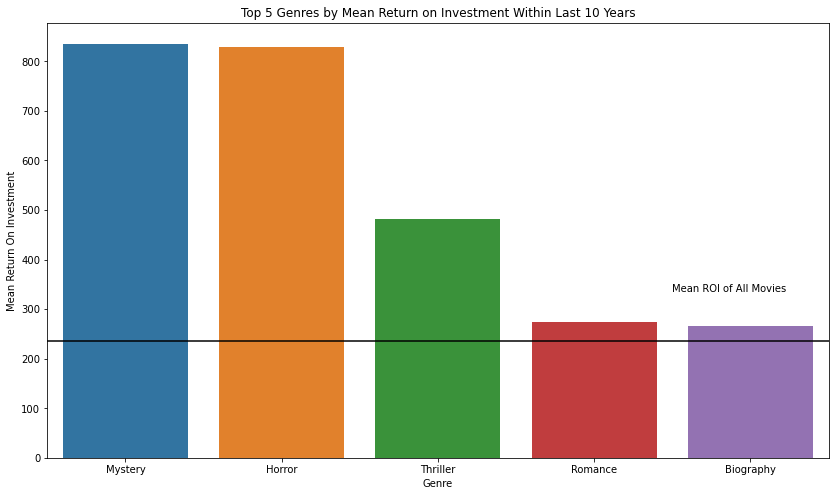

In [9]:
fig, ax = plt.subplots(figsize=(14,8))

sns.barplot(data=test5, x=test5.index, y='ROI', ax=ax)
ax.set_xlabel('Genre')
ax.set_ylabel('Mean Return On Investment')
ax.set_title('Top 5 Genres by Mean Return on Investment Within Last 10 Years')
ax.axhline(y=test.ROI.mean(), c='k')
ax.annotate('Mean ROI of All Movies',(3.5, float(test.ROI.mean()) + 100))
;

''

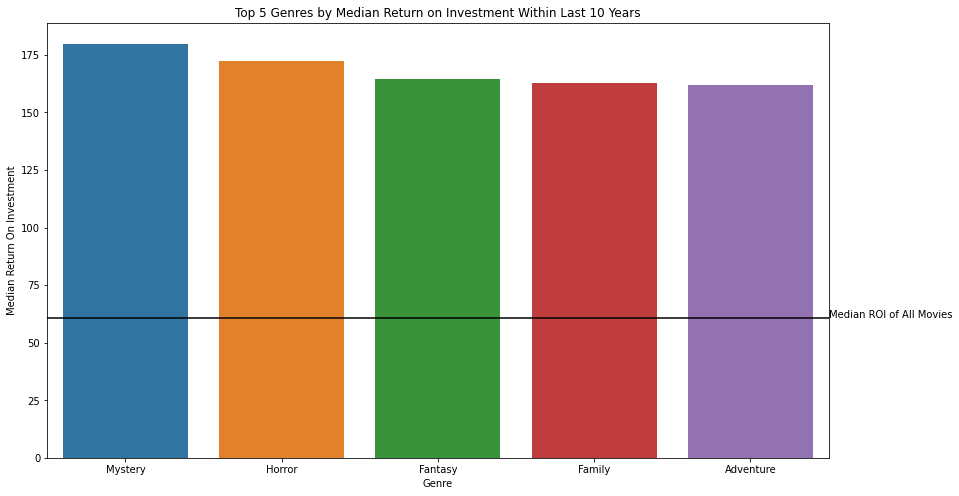

In [10]:
test6 = test2.groupby('genres').agg({'ROI': 'median', 'prod_budget': 'median', 'title': 'count'}).sort_values('ROI', ascending=False)
test6.title = test6.title.astype(int)
test6 = test6.loc[test6.title >= 100]
test6 = test6.nlargest(5, 'ROI')
fig, ax = plt.subplots(figsize=(14,8))

sns.barplot(data=test6, x=test6.index, y='ROI', ax=ax)
ax.set_xlabel('Genre')
ax.set_ylabel('Median Return On Investment')
ax.set_title('Top 5 Genres by Median Return on Investment Within Last 10 Years')
ax.axhline(y=test.ROI.median(), c='k')
ax.annotate('Median ROI of All Movies',(4.5, test.ROI.median()))
;



In [11]:
test7 = test2.groupby(['genres', 'ROI']).first()

In [12]:
test8 = test7.reset_index(1)['ROI']

In [13]:
test8 = test8.reset_index()

In [14]:
genres_to_evaluate = ['Mystery', 'Horror', 'Fantasy', 'Family', 'Adventure', 'Thriller', 'Romance', 'Biography']


In [15]:
test8 = test8.loc[test8.genres.isin(genres_to_evaluate)]

In [16]:
test8

,genres,ROI
369,Adventure,-100.000000
370,Adventure,-99.940000
371,Adventure,-99.738356
372,Adventure,-99.205725
373,Adventure,-98.498090
...,...,...
4004,Thriller,4141.172100
4005,Thriller,5007.359020
4006,Thriller,6336.419800
4007,Thriller,10075.949000


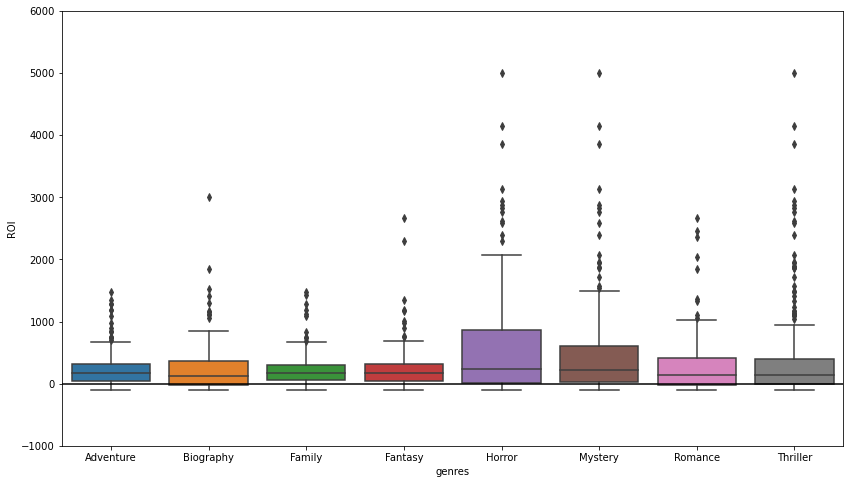

In [24]:
fig, ax = plt.subplots(figsize=(14,8))

sns.boxplot(data=test8, x=test8.genres, y=test8.ROI, ax=ax)
ax.set_ylim([-1000, 6000])
ax.axhline(y=0, c='k');

In [31]:
test8.genres.unique()

array(['Adventure', 'Biography', 'Family', 'Fantasy', 'Horror', 'Mystery',
       'Romance', 'Thriller'], dtype=object)

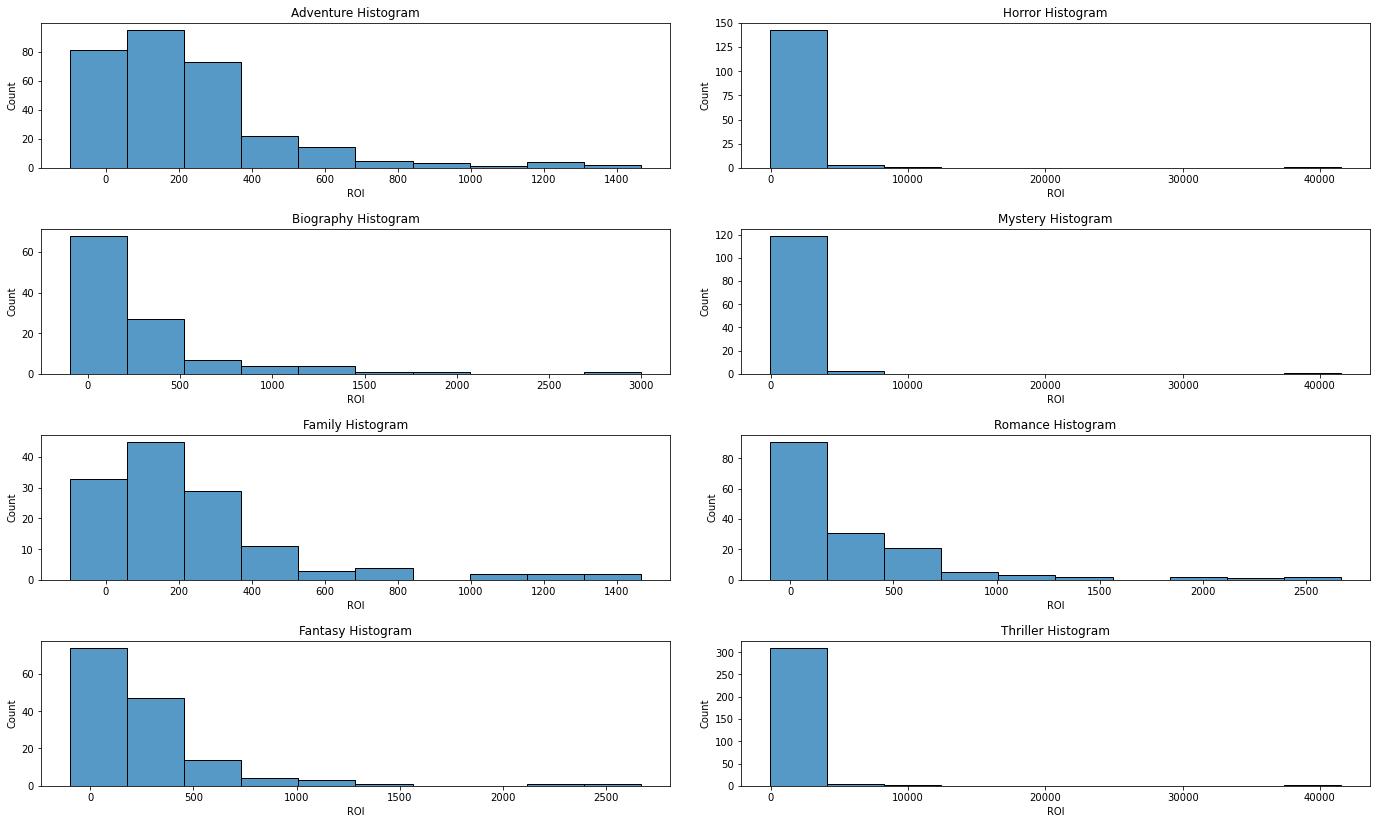

In [63]:
fig, ax = plt.subplots(4,2, figsize=(20,12))

plt.tight_layout(pad = 4.0)

for index, genre in enumerate(list(test8.genres.unique())):
    axis = ax[index % 4][index // 4]
    sns.histplot(data = test8,
                 x = test8.loc[test8.genres == genre].ROI,
                 common_norm = False,
                 bins = 10,
                 ax = axis);
    axis.set_title('{} Histogram'.format(genre));

plt.show()